# Nandini Jaiswal - MDS202335

# Assignment 5 - Transfer Learning for image data using CNN

# Installing Required Python Packages

In [ ]:
!pip install -q duckduckgo_search ipython-autotime
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.1 MB/s eta 0:00:00
time: 314 µs (started: 2025-04-19 14:49:21 +00:00)


# Importing Libraries and Downloading NLTK Resources


In [ ]:
import warnings
from sklearn.metrics import classification_report
import matplotlib.image as mpimg
from tensorflow.keras.applications.resnet import decode_predictions
from urllib.parse import urlparse, unquote
import numpy as np
from tensorflow.keras import layers, models
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from fastcore.all import *
import requests
from tensorflow.keras.applications import ResNet152V2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from urllib.request import urlopen
from duckduckgo_search import DDGS
import random
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings("ignore")

time: 7.23 s (started: 2025-04-19 14:49:21 +00:00)


# Search for Images using DuckDuckGo

- The `search_images` function uses the DuckDuckGo Search API (`ddgs`) to fetch image URLs for a given search term.
- Returns a list of image URLs (up to a specified `max_images` limit, default is 30).


In [ ]:
ddgs = DDGS()

def search_images(term, max_images=30):
    """Search for images using DuckDuckGo and return URLs.

    Args:
        term (str): Search term
        max_images (int): Maximum number of images to return (default 30)

    Returns:
        list: List of image URLs or empty list if error occurs
    """
    try:
        searches = ddgs.images(keywords=term, max_results=max_images)
        if not searches:
            return []

        return [item["image"] for item in searches]

    except Exception as e:
        print(f"Error searching for images '{term}': {e}")
        return []

time: 11.9 ms (started: 2025-04-19 14:49:28 +00:00)


In [ ]:
os.makedirs('animals/duck', exist_ok=True)
os.makedirs('animals/chicken', exist_ok=True)

time: 1.23 ms (started: 2025-04-19 14:49:28 +00:00)


# Check for Valid Image Data

- `is_valid_image` verifies if binary data can be decoded into a valid image.
- Uses OpenCV to decode the image and checks:
  - Data is in byte format.
  - Image is successfully decoded.
  - Image has 3 channels (i.e., color image) and is non-empty.
- Returns `True` for valid images, otherwise `False`.


In [ ]:
def is_valid_image(image_data):
    """Check if the provided binary data represents a valid image.

    Args:
        image_data (bytes): Binary image data to validate

    Returns:
        bool: True if valid image, False otherwise
    """
    if not isinstance(image_data, (bytes, bytearray)):
        return False

    try:
        np_array = np.frombuffer(image_data, dtype=np.uint8)
        img = cv2.imdecode(np_array, cv2.IMREAD_COLOR)
        return img is not None and len(img.shape) == 3 and img.size > 0
    except Exception:
        return False

time: 657 µs (started: 2025-04-19 14:49:28 +00:00)


# Extract File Extension from URL

- `extract_extension` extracts the file type from a given image URL.
- Handles:
  - Encoded characters and query parameters.
  - Common image formats: `jpg`, `jpeg`, `png`, `gif`, `webp`.
- Returns the detected extension or defaults to `'jpg'` if none is found.


In [ ]:
def extract_extension(url):
    """
    Extract the file extension from a URL, handling query parameters and encoded characters.

    Args:
        url (str): The URL to extract the extension from

    Returns:
        str: The file extension (without the dot), or 'jpg' if no extension found
    """
    if not url:
        return 'jpg'

    try:
        parsed = urlparse(unquote(url))
        path = parsed.path

        filename = path.split('/')[-1] if path else ""

        if '.' in filename:
            ext = filename.rsplit('.', 1)[-1].lower()
            ext = ext.split('?')[0].split('#')[0]  # Remove query/fragment

            if ext in ALLOWED_EXTENSIONS:
                return ext

    except Exception:
        pass

    return 'jpg'

time: 748 µs (started: 2025-04-19 14:49:28 +00:00)


# Download and Save Images from URLs

- `download_images(image_urls, directory)` saves images from a list of URLs.
- Key features:
  - Downloads up to 100 images.
  - Validates image data using `is_valid_image()`.
  - Determines the correct file extension using `extract_extension()`.
  - Saves each image to `animals/<directory>/`


In [ ]:
def download_images(image_urls, directory):
    image_id = 1
    for url in image_urls:
        if image_id > 100:
            break
        try:
            response = requests.get(url)
            response.raise_for_status()
            if not is_valid_image(response.content):
              print(f"Invalid image: {url}")
            file_ext = extract_extension(url)
            filename = f'image_{image_id}.{file_ext}'
            file_path = os.path.join(f'animals/{directory}', filename)
            with open(file_path, 'wb') as f:
                f.write(response.content)
            image_id += 1
            print(f'Downloaded: {file_path}')
        except Exception as e:
            print(f'Failed to download {url}: {e}')

time: 974 µs (started: 2025-04-19 14:49:28 +00:00)


In [ ]:
targets = [['duck', 'A duck/goose/drake in nature background'], ['chicken', 'A hen/cock in nature background']]

for target in targets:
    directory, keyword = target
    image_urls = search_images(keyword, max_images=200)
    download_images(image_urls, directory)

Failed to download https://static.vecteezy.com/system/resources/previews/046/648/669/large_2x/an-image-of-a-single-duck-swimming-on-a-pond-with-water-ripples-photo.jpg: 403 Client Error: Forbidden for url: https://static.vecteezy.com/system/resources/previews/046/648/669/large_2x/an-image-of-a-single-duck-swimming-on-a-pond-with-water-ripples-photo.jpg
Downloaded: animals/duck/image_1.jpg
Downloaded: animals/duck/image_2.jpg
Downloaded: animals/duck/image_3.jpg
Downloaded: animals/duck/image_4.jpg
Downloaded: animals/duck/image_5.jpg
Downloaded: animals/duck/image_6.jpg
Downloaded: animals/duck/image_7.jpg
Downloaded: animals/duck/image_8.jpg
Downloaded: animals/duck/image_9.jpg
Downloaded: animals/duck/image_10.jpg
Downloaded: animals/duck/image_11.jpg
Downloaded: animals/duck/image_12.jpg
Downloaded: animals/duck/image_13.jpg
Downloaded: animals/duck/image_14.jpg
Downloaded: animals/duck/image_15.jpg
Downloaded: animals/duck/image_16.jpg
Downloaded: animals/duck/image_17.jpg
Download

# Load and Preprocess Images

- Loads images from `animals/` directory.
- Converts images to RGB, resizes to 224x224, normalizes pixel values.
- Assigns class labels based on folder names.
- Returns image and label arrays for model training.

In [ ]:
def load_and_preprocess_images(directory, target_size=(224, 224)):
    images, labels = [], []
    class_names = sorted(os.listdir(directory))

    for class_label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = load_single_image(image_path, target_size)

            if image is not None:
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

def load_single_image(image_path, target_size):
    try:
        image = cv2.imread(image_path)
        if image is None:
            return None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, target_size)
        return image.astype('float32') / 255.0

    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

time: 4.17 s (started: 2025-04-19 14:50:42 +00:00)


# Visualize Random Images

- Selects and displays random images from the dataset.
- Shows image along with its class label.


In [ ]:
def plot_random_images(images, labels, class_names, num_images=24):
    indices = random.sample(range(len(images)), num_images)
    selected_images = images[indices]
    selected_labels = labels[indices]

    plt.figure(figsize=(15, 6))

    for i in range(num_images):
        plt.subplot(4, 6, i + 1)
        plt.imshow(selected_images[i])
        plt.title(class_names[selected_labels[i]], fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

time: 510 µs (started: 2025-04-19 14:50:46 +00:00)


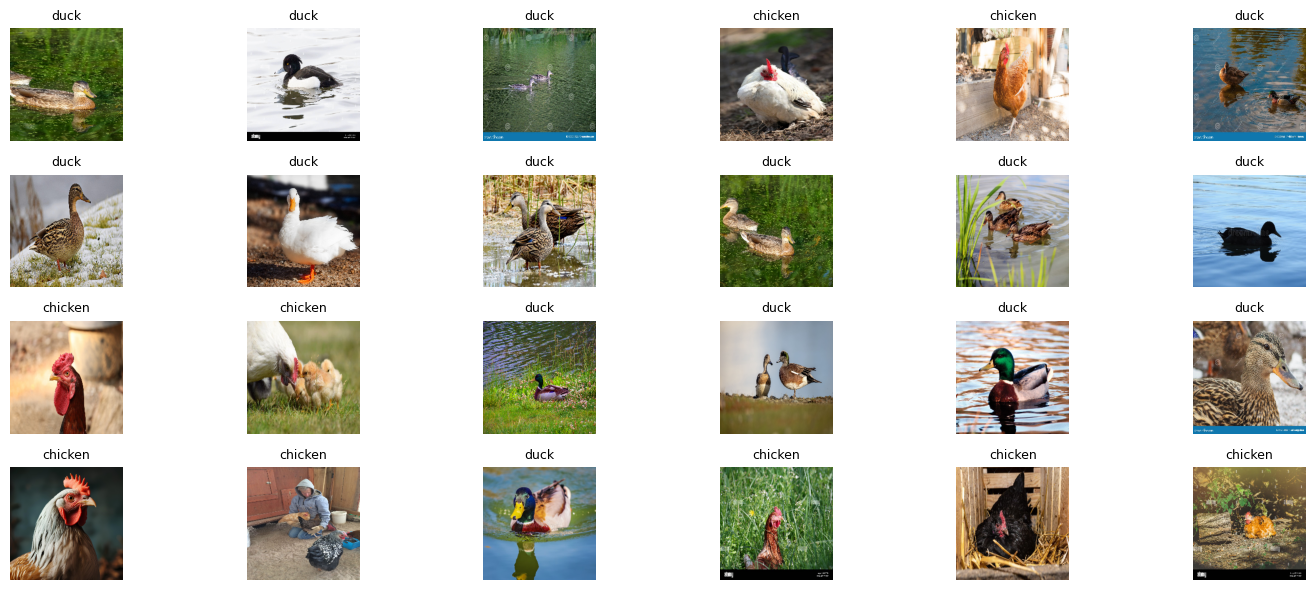

time: 1.19 s (started: 2025-04-19 14:50:46 +00:00)


In [ ]:
class_names = sorted(os.listdir('animals'))
plot_random_images(images, labels, class_names)

# Data Splitting & Augmentation

- Splits dataset into training, validation, and test sets (80/20 split).
- Applies data augmentation (rotation, zoom, flip, etc.) using `ImageDataGenerator` to improve model generalization.
- Generates training batches.


In [ ]:
X, y = images, labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

time: 93.3 ms (started: 2025-04-19 14:50:48 +00:00)


# Performance of the base model: `ResNet152v2`

## Image Preprocessing

In [ ]:
def preprocess(image: tf.Tensor) -> tf.Tensor:
    """Preprocess image for ResNet152V2 model input.

    Args:
        image: Input image tensor (any size, 3 channels)

    Returns:
        Preprocessed image tensor (1, 224, 224, 3) ready for ResNet152V2
    """
    # Convert and resize
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))

    # Model-specific preprocessing (normalization/scaling)
    image = tf.keras.applications.resnet.preprocess_input(image)

    # Add batch dimension
    return tf.expand_dims(image, axis=0)

time: 504 µs (started: 2025-04-19 14:50:48 +00:00)


## Get Random Images from Folder


In [ ]:
def get_random_images(folder: str, num: int = 5) -> list[str]:
    """Select random image paths from folder with safety checks."""
    valid_extensions = ('.jpg', '.jpeg', '.png', '.webp')

    image_files = [
        os.path.join(folder, fname)
        for fname in os.listdir(folder)
        if fname.lower().endswith(valid_extensions)
    ]

    sample_size = min(num, len(image_files))
    if not image_files:
        raise ValueError(f"No valid images found in {folder}")

    return random.sample(image_files, sample_size)

time: 535 µs (started: 2025-04-19 14:50:48 +00:00)


## Load Pre-trained ResNet152V2 Model

In [ ]:
from tensorflow.keras.applications import ResNet152V2

base_model = ResNet152V2(
    weights='imagenet',
    include_top=True,
    input_shape=(224, 224, 3)
)

242745792/242745792 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
time: 7.42 s (started: 2025-04-19 14:50:48 +00:00)


## Process Image and Make Predictions

In [ ]:
def process_and_predict(image_path: str) -> tuple[tf.Tensor, list]:
    """Process image and get top-5 predictions using ResNet152V2."""
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)

        processed_image = preprocess(image)

        predictions = base_model.predict(processed_image, verbose=0)
        top_predictions = decode_predictions(predictions, top=5)[0]

        return processed_image, top_predictions

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        raise

time: 590 µs (started: 2025-04-19 14:50:55 +00:00)


## Display Image with Prediction Results

In [ ]:
def show_results(image_path, predictions, class_name):
    original_img = plt.imread(image_path)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title(class_name)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.text(0.1, 0.5, "\n".join(
        [f"{i+1}: {label} ({prob:.2%})"
         for i, (_, label, prob) in enumerate(predictions)]
    ), fontsize=12)
    plt.axis('off')
    plt.title("ResNet152 predictions")
    plt.show()

time: 788 µs (started: 2025-04-19 14:50:55 +00:00)


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


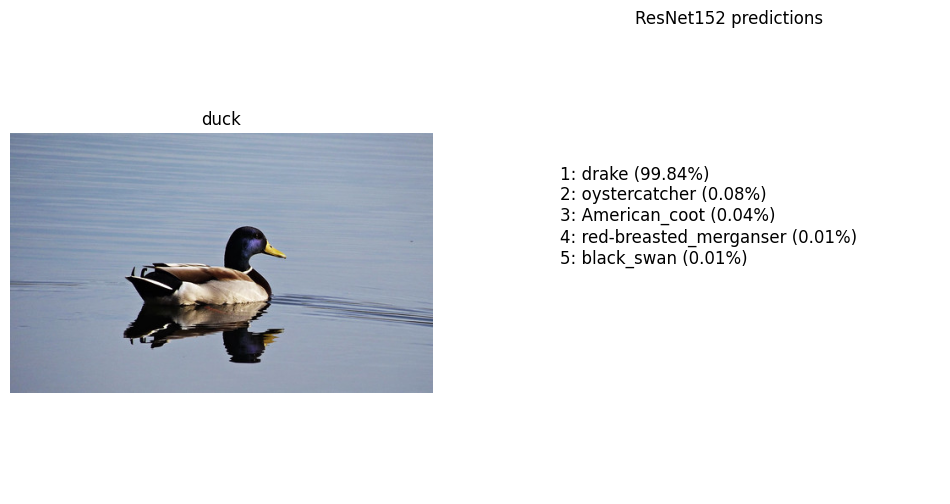

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


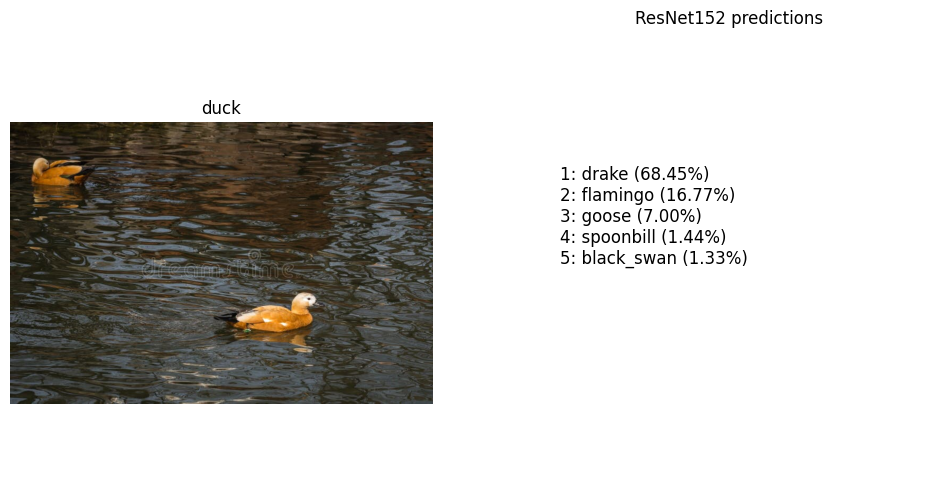

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


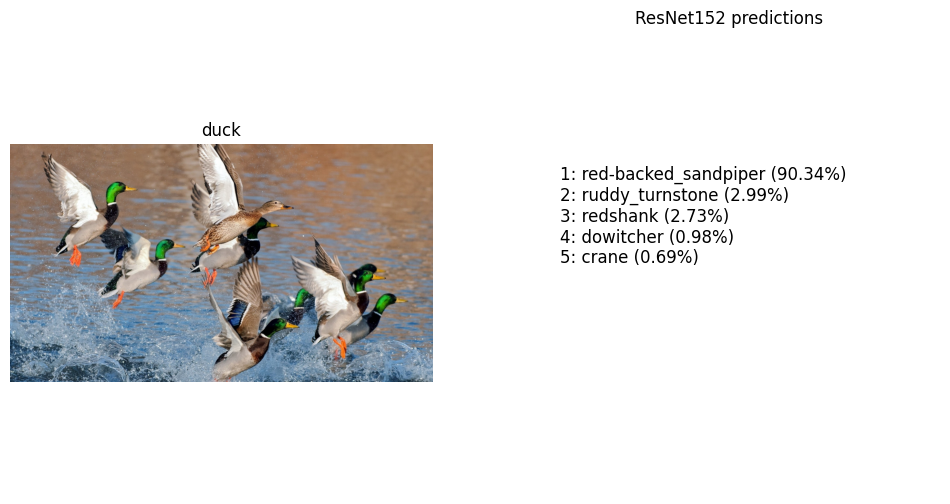

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


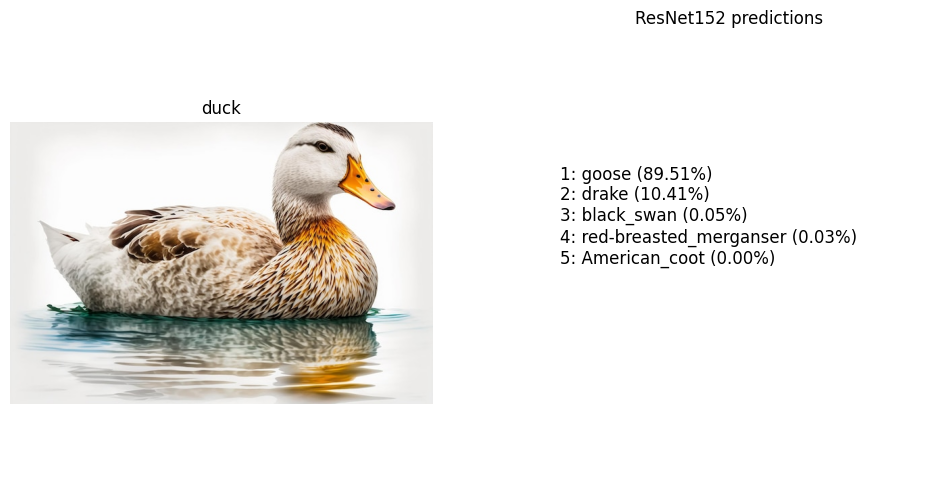

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


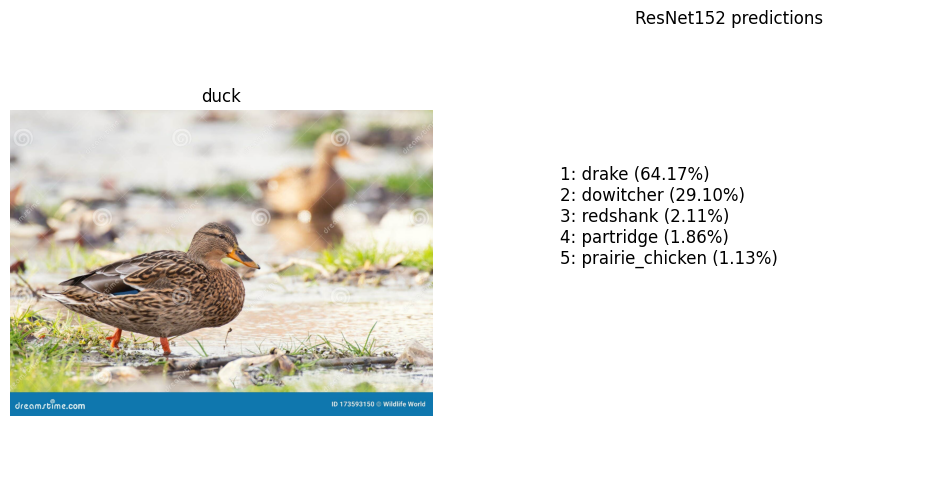

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


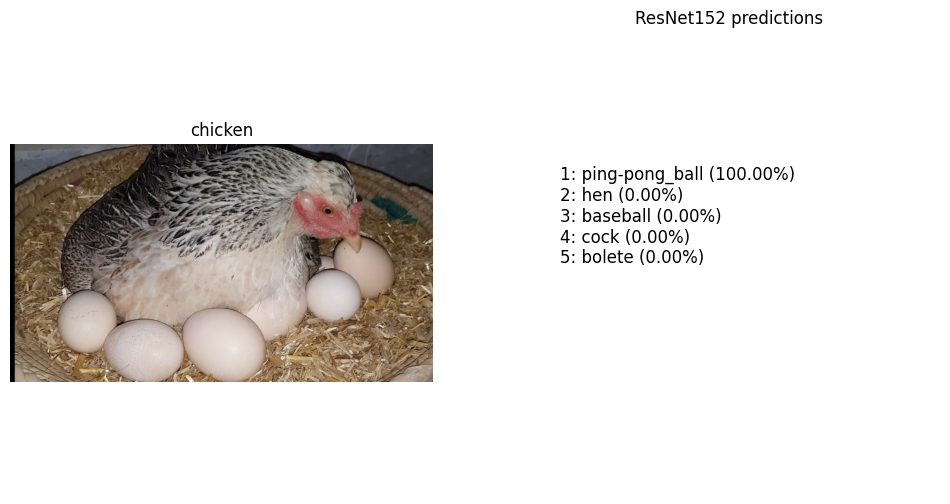

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


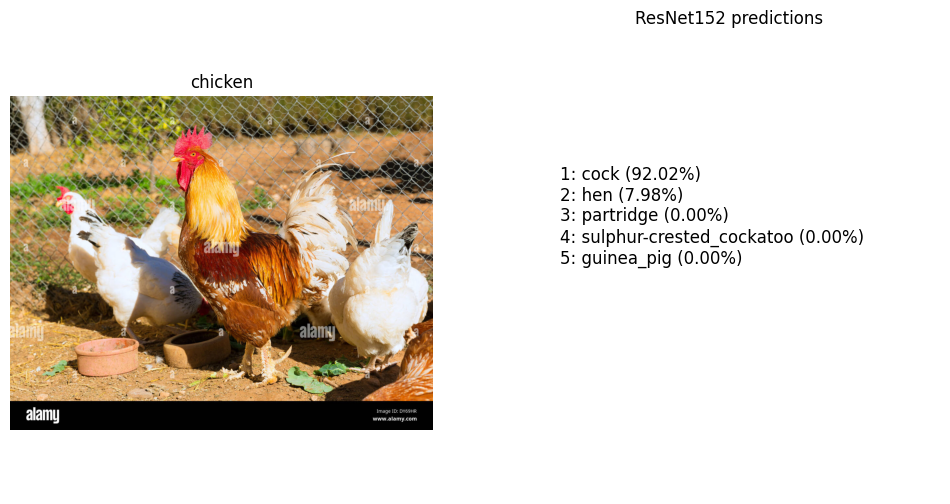

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


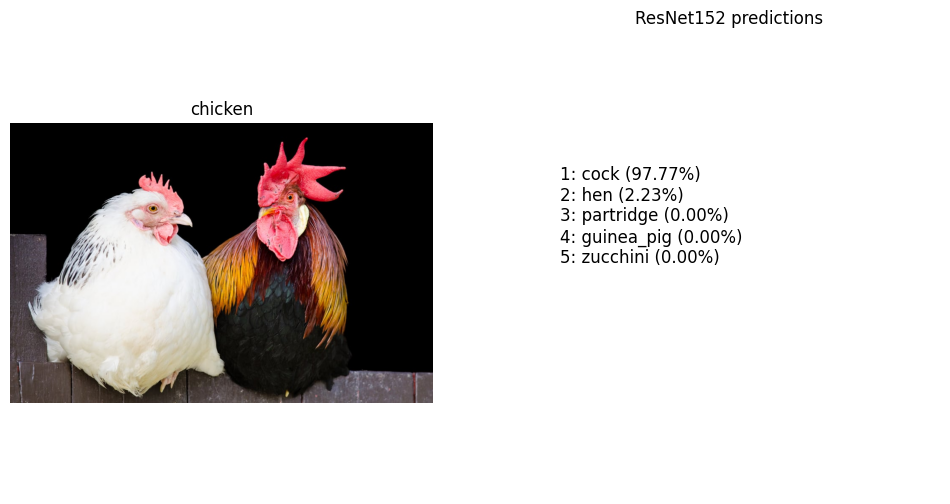

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


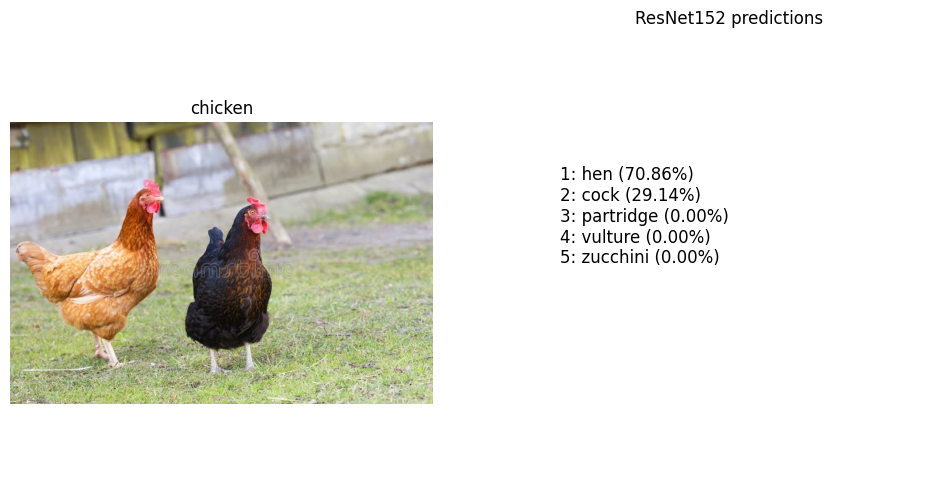

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


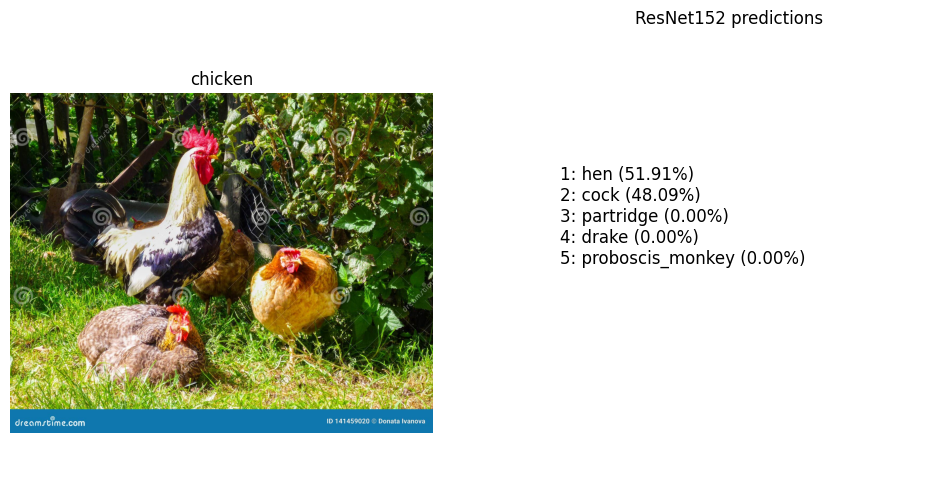

time: 25.1 s (started: 2025-04-19 14:50:55 +00:00)


In [ ]:
for img_path in get_random_images('animals/duck'):
    _, preds = process_and_predict(img_path)
    show_results(img_path, preds, "duck")

for img_path in get_random_images('animals/chicken'):
    _, preds = process_and_predict(img_path)
    show_results(img_path, preds, "chicken")

# ResNet152V2 Model Setup

- **Base Model Initialization**: The `ResNet152V2` model is initialized with `include_top=False`, excluding the final classification layers.
- **ImageNet Weights**: The model is loaded with pre-trained weights from ImageNet.
- **Input Shape**: The input shape is set to `(224, 224, 3)` to match the image size used in ResNet.


In [ ]:
base_model = ResNet152V2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

print(len(base_model.layers))

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
564
time: 5.28 s (started: 2025-04-19 14:51:20 +00:00)


# Model Definition with ResNet152V2

- **Freezing Base Model**: `base_model.trainable = False` prevents weight updates in ResNet152V2.
- **Custom Layers**:
  - **GlobalAveragePooling2D**: Reduces spatial dimensions.
  - **Dense (128 units)**: For feature learning with ReLU activation.
  - **Dropout (0.5)**: To prevent overfitting.
  - **Dense (1 unit, sigmoid)**: For binary classification.

In [ ]:
base_model.trainable = False

# Note that, there are total 564 layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

time: 31.5 ms (started: 2025-04-19 14:51:26 +00:00)


# Model Compilation

- **Optimizer**: Adam with learning rate 0.0001.
- **Loss Function**: Binary cross-entropy for binary classification.
- **Metrics**: Accuracy to track model performance during training.

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

time: 10.2 ms (started: 2025-04-19 14:51:26 +00:00)


# Model Training with Early Stopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.5098 - loss: 1.0400 - val_accuracy: 0.6750 - val_loss: 0.5836
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 510ms/step - accuracy: 0.6456 - loss: 0.7258 - val_accuracy: 0.8500 - val_loss: 0.3939
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 527ms/step - accuracy: 0.7206 - loss: 0.5924 - val_accuracy: 0.8750 - val_loss: 0.2782
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 627ms/step - accuracy: 0.7645 - loss: 0.4626 - val_accuracy: 0.9250 - val_loss: 0.2051
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 522ms/step - accuracy: 0.7781 - loss: 0.4141 - val_accuracy: 0.9750 - val_loss: 0.1661
time: 58.8 s (started: 2025-04-19 14:51:26 +00:00)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet152v2 (Functional)        │ (None, 7, 7, 2048)     │    58,331,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,118,853 (225.52 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 58,331,648 (222.52 MB)

 Optimizer params: 524,804 (2.00 MB)

time: 30.6 ms (started: 2025-04-19 14:52:24 +00:00)


# Plotting Training and Validation Metrics

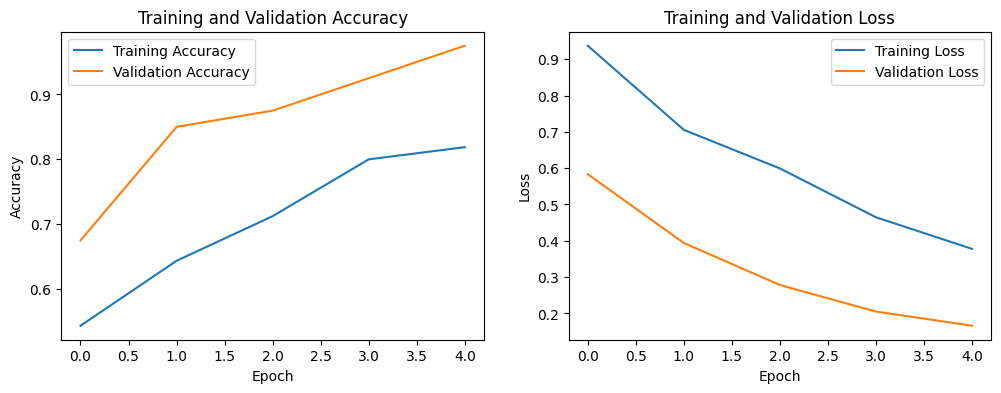

time: 240 ms (started: 2025-04-19 14:52:25 +00:00)


In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Fine-tuning Pre-trained Model

- **Unfreeze**: Enable training for all layers in the base model.
- **Freeze**: Freeze the first 450 layers of the base model to retain their pre-trained weights.

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:450]:
    layer.trainable = False

time: 8.01 ms (started: 2025-04-19 14:52:25 +00:00)


# Compile the Model for FineTuning


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

time: 36.7 ms (started: 2025-04-19 14:52:25 +00:00)


# Fine-tuning the Pre-trained ResNet152V2 Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.7935 - loss: 0.4430 - val_accuracy: 0.9750 - val_loss: 0.1485
Epoch 2/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 732ms/step - accuracy: 0.7609 - loss: 0.4557 - val_accuracy: 0.9750 - val_loss: 0.1352
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 780ms/step - accuracy: 0.8411 - loss: 0.4176 - val_accuracy: 0.9750 - val_loss: 0.1234
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 722ms/step - accuracy: 0.8633 - loss: 0.3673 - val_accuracy: 0.9750 - val_loss: 0.1156
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 727ms/step - accuracy: 0.8732 - loss: 0.3689 - val_accuracy: 0.9750 - val_loss: 0.1106
time: 2min 39s (started: 2025-04-19 14:52:25 +00:00)


# Plotting Training and Validation Metrics (after fine-tuning)

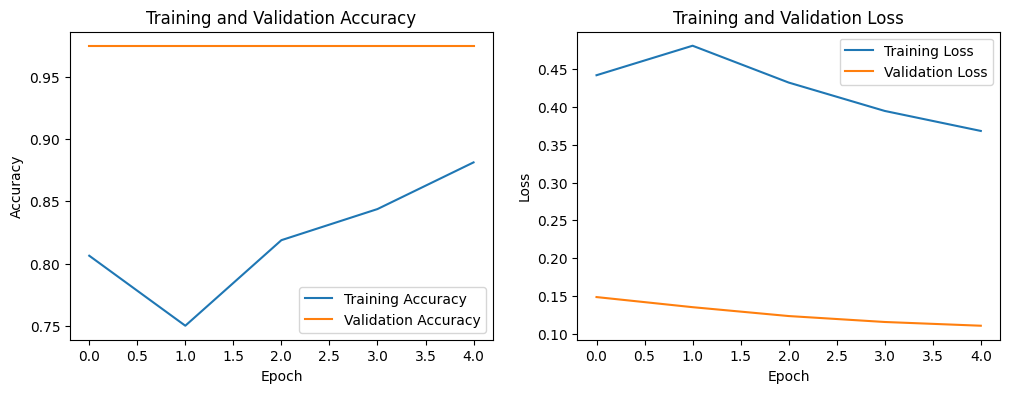

time: 238 ms (started: 2025-04-19 14:55:04 +00:00)


In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Model Evaluation and Classification Report Generation









In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype('int')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['chicken', 'duck']))

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step

Classification Report:
              precision    recall  f1-score   support

     chicken       1.00      0.95      0.98        21
        duck       0.95      1.00      0.97        19

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

time: 19.3 s (started: 2025-04-19 14:55:05 +00:00)


# Visualizing Model Predictions on Test Set

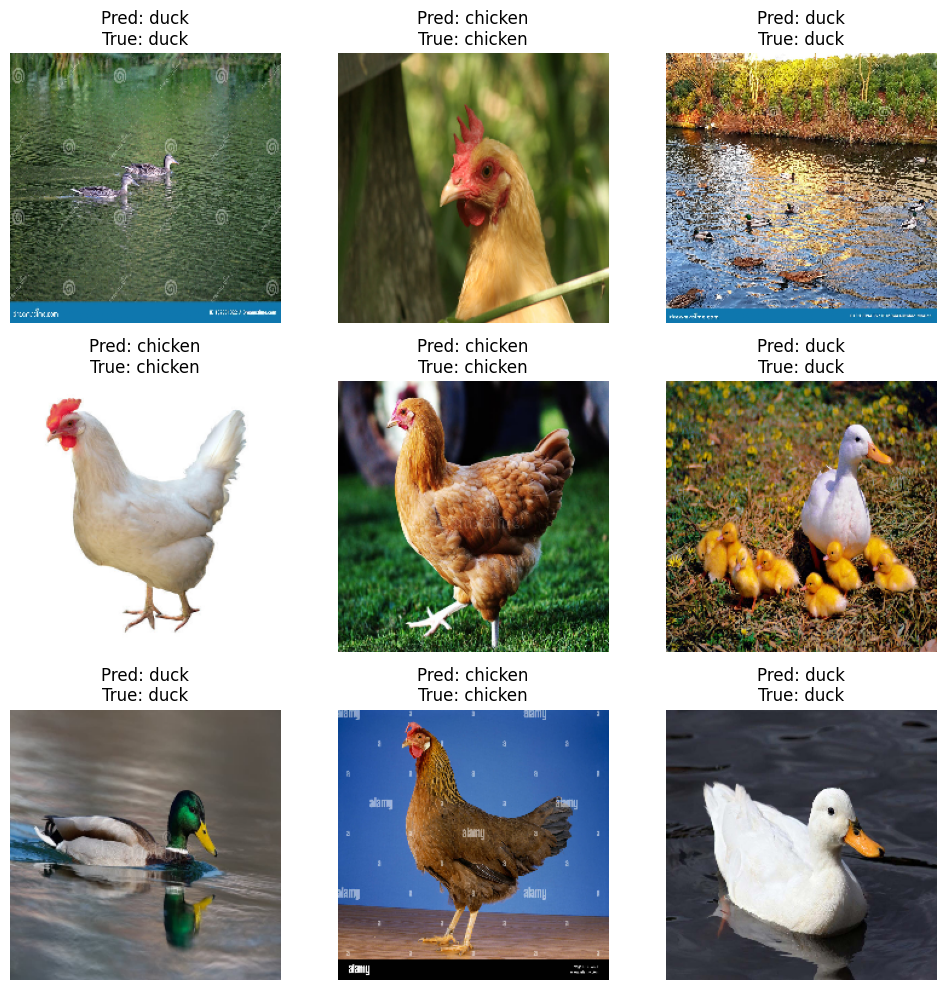

time: 782 ms (started: 2025-04-19 14:55:24 +00:00)


In [ ]:
plt.figure(figsize=(10, 10))

random_indices = np.random.choice(len(X_test), size=9, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx])
    pred_label = 'duck' if y_pred_classes[idx] == 1 else 'chicken'
    true_label = 'duck' if y_test[idx] == 1 else 'chicken'
    plt.title(f'Pred: {pred_label}\nTrue: {true_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Displaying Incorrect Predictions with Confidence Scores


Found 1 incorrect prediction(s). Showing them:



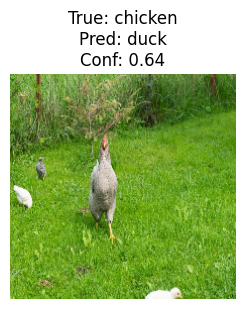

time: 112 ms (started: 2025-04-19 14:55:25 +00:00)


In [ ]:
# Flatten predictions and find incorrect indices
y_pred_flattened = np.concatenate(y_pred_classes)
incorrect_mask = y_pred_flattened != y_test
incorrect_indices = np.where(incorrect_mask)
num_incorrect = len(incorrect_indices)

print(f"\nFound {num_incorrect} incorrect prediction(s). Showing them:\n")

num_to_display = min(9, num_incorrect)
rows = int(np.ceil(num_to_display / 3))
plt.figure(figsize=(12, 3 * rows))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(rows, 3, i+1)

    pred_label = 'duck' if y_pred_classes[idx] == 1 else 'chicken'
    true_label = 'duck' if y_test[idx] == 1 else 'chicken'
    confidence = max(y_pred[idx][0], 1 - y_pred[idx][0])

    plt.imshow(X_test[idx])
    plt.title(f"True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()